## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import random

## Custom implementation of KMeans

In [2]:
class Cluster:
    def __init__(self,center):
        self.center = center
        self.point = []

    def distance(self,point):
        return np.sqrt(np.sum((point-self.center)**2))

class CustomKMeans:
    # Step 1: choosing the number of clusters "k"
    def __init__(self, k=3 , max_iterations =15):
        self.k = k
        self.max_iterations = max_iterations

    def fit(self,X):
        clusters = []
        # Step 2: selecting random centers for each cluster
        for i in range(self.k):
            cluster = Cluster(center = random.choice(X))
            clusters.append(cluster)


        # Step 3: Assign all the points to the closest cluster-center
        # there should be labels for each cluster-center
        for i in range(self.max_iterations):

            labels =[]
            for point in X:
                distances =[]
                # calculation of intracluster distance i.e the distance of all the points within a cluster from the center of that cluster
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                # finding index of closest cluster of each point in X
                closest_index =np.argmin(distances)
                closest_cluster = clusters[closest_index]

                closest_cluster.point.append(point)
                labels.append(closest_index)
            
        # Step 4: Recompute/relocate the centers of newly formed clusters
            for cluster in clusters:
                # cluster-center will relocate to the mean of pts about axis 0
                cluster.center = np.mean(cluster.point,axis = 0)

        # labels is our "y"
        self.labels = labels
        self.cluster_centers_=[cluster.center for cluster in clusters]


## Getting Data

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=3,random_state=42)

## Model Building

In [4]:
model = CustomKMeans(k=3)
model.fit(X)

## Visualization

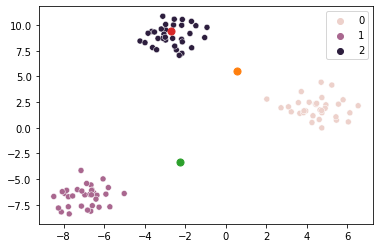

In [5]:
sns.scatterplot(x =X[:,0],y=X[:,1] , hue = model.labels)

for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=50)

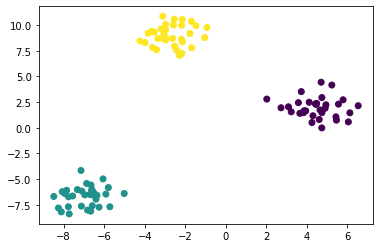

In [6]:
plt.scatter(X[:,0],X[:,1], c=model.labels)

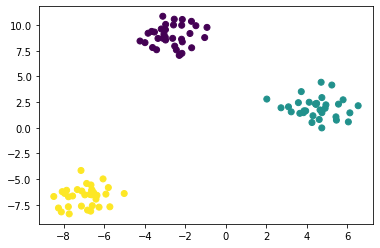

In [7]:
plt.scatter(X[:,0],X[:,1] , c=y)